<h1>Experiment XX: Legacy NW matcher tuning avg on mb 2014</h1><br>
...explanation should go here...

In [1]:
colab = False
try:
  from google.colab import drive
  drive.mount("/content/gdrive")
  colab = True
  %cd '/content/gdrive/My Drive/python_projects/FYP'
except Exception:
  pass

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/python_projects/FYP


In [0]:
import numpy as np
from components.classes.NumbaSimpleMatcher import Wrapper as m
from components.classes.SimpleProgressBar import SimpleProgressBar

from components.non_oo_entities import utils as u
import imp
import cv2
import os
import matplotlib.pyplot as plt
import gc
from components.classes.CSVExperimentLogger import CSVExperimentLogger as l
from components.classes.Metrix import Metrix as me
import time
import glob

File ./test_outputs/numba_sm_avg_mbury_2005/1/numba_sm.csv already exists, header has not been written.


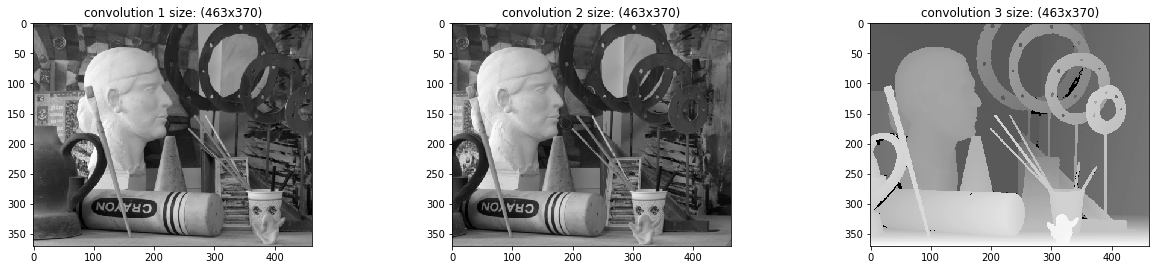

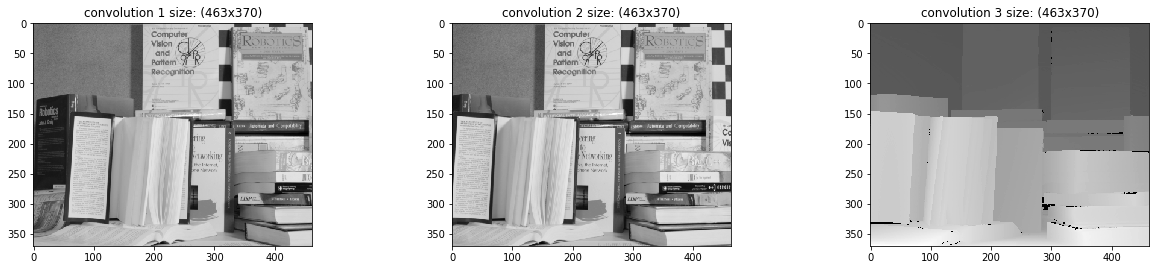

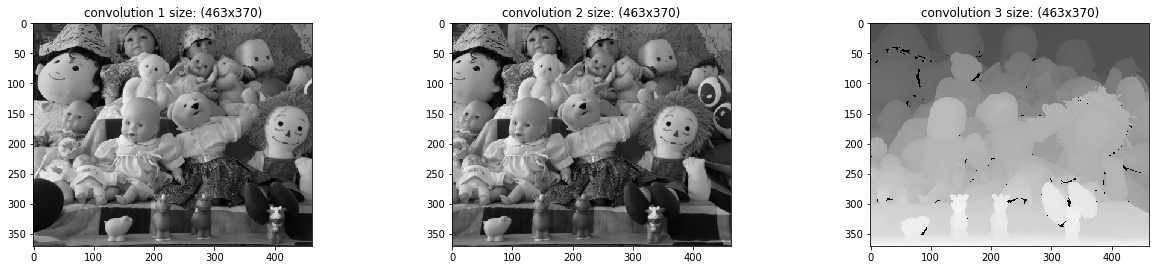

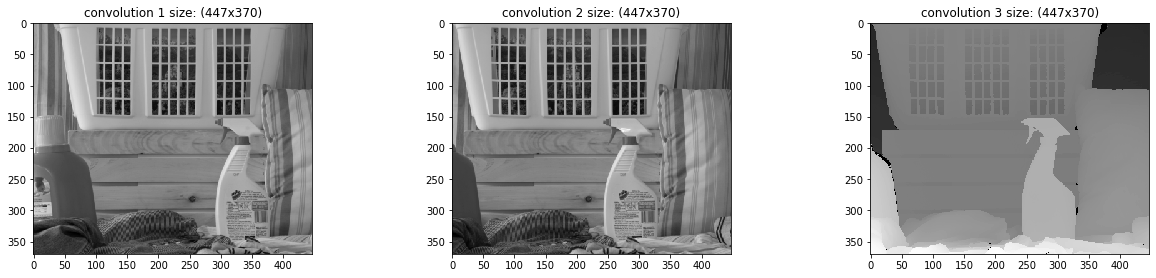

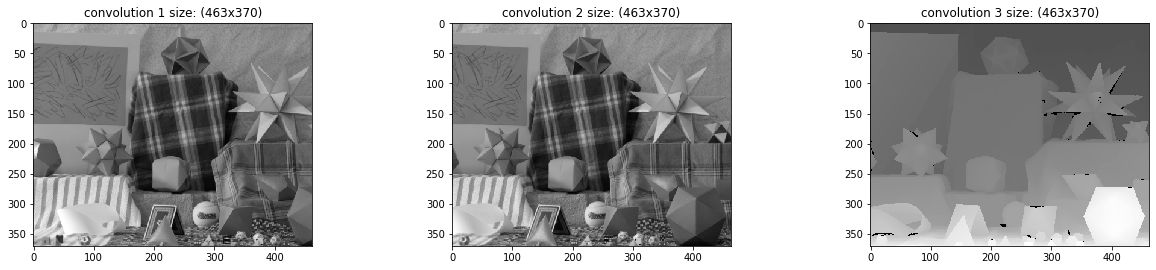

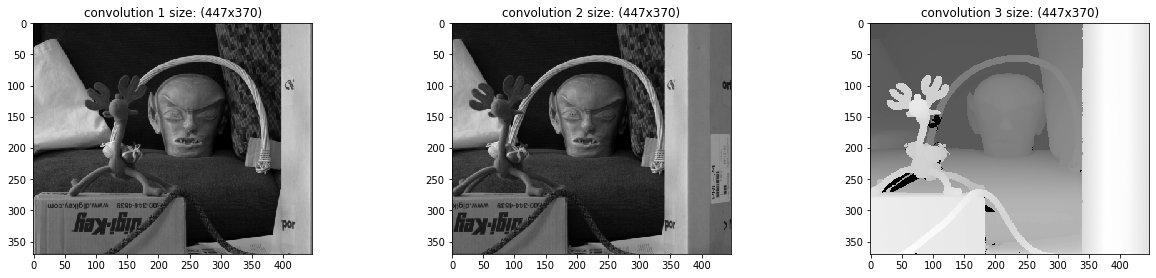

In [0]:
ROOT_DATA_SRC = "./test_outputs"
ROOT_LOG = "./test_outputs"
LOG_DIRECTORY = ROOT_LOG+"/numba_sm_avg_mbury_2005/1"
CSV_FILE_NAME =  "numba_sm.csv"
OUTPUT_PATH = ROOT_DATA_SRC
CSV_FILE_PATH = os.path.join(LOG_DIRECTORY, CSV_FILE_NAME)
log = l(file_path = CSV_FILE_PATH)
progress_bar = SimpleProgressBar.get_instance()

root_folder = "./datasets/middlebury_2005"
entries_in_root_data_folder = np.array([entry for entry in os.scandir(root_folder)])
directory_entries = entries_in_root_data_folder[[entry.is_dir() for entry in entries_in_root_data_folder]]
img_paths_1 = sorted([dir_entry.path + "/view1.png" for dir_entry in directory_entries])
img_paths_2 = sorted([dir_entry.path + "/view5.png" for dir_entry in directory_entries])
disp_paths = sorted([dir_entry.path+ "/disp5.png" for dir_entry in directory_entries])


loaded_imgs_1 =[]
loaded_imgs_2 =[]
loaded_disps = []


for i,j,k in  zip(img_paths_1, img_paths_2, disp_paths):
    im_i = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
    im_j = cv2.imread(j, cv2.IMREAD_GRAYSCALE)
    im_k = cv2.imread(k, cv2.IMREAD_GRAYSCALE)
    loaded_imgs_1.append(im_i)
    loaded_imgs_2.append(im_j)
    loaded_disps.append(im_k)
    u.plotNImages2([im_i, im_j, im_k] , cols = 3)
NUMBER_OF_IMAGES = len(img_paths_1)

In [0]:
spec_dict = dict({})
spec_dict["output_folder"] = OUTPUT_PATH
spec_dict["is_parallel"] = "True"
spec_dict["img_name"] = "cones"
spec_dict["alg_type"] =  "simle_numba_matcher_avgd"
spec_dict["is_img_preprocessed"] = "False"
spec_dict["convolution_filters"] = "-"
spec_dict["filter_strategy"] = "-"
spec_dict["matching_mode"] = non_occ =  "non_occ"
spec_dict["matrix_init_mode"] = 0
match = spec_dict["match"] = 0
gap = spec_dict["gap"] = 0
egap = spec_dict["egap"] = 0
print("Please define the output image's extension")
spec_dict["ext"] = "png" #input()

Please define the output image's extension


In [0]:
#loop params start/end/step
import math
loop_params = {}
loop_params["match"] = {"start": 130, "end":-10, "step":-10}
loop_params["gap"] = {"start":0, "end":-100, "step":-10}
loop_params["egap"] = {"start":10, "end":-100, "step":-10}

number_of_iterations = 1

for v in loop_params.values():
  temp = math.ceil(abs((v["start"]-v["end"])/v["step"]))
  print(temp)
  number_of_iterations *= temp

number_of_iterations =number_of_iterations * NUMBER_OF_IMAGES
print("The number of iterations based on the params: {0}".format(round(number_of_iterations)))

14
10
11
The number of iterations based on the params: 9240


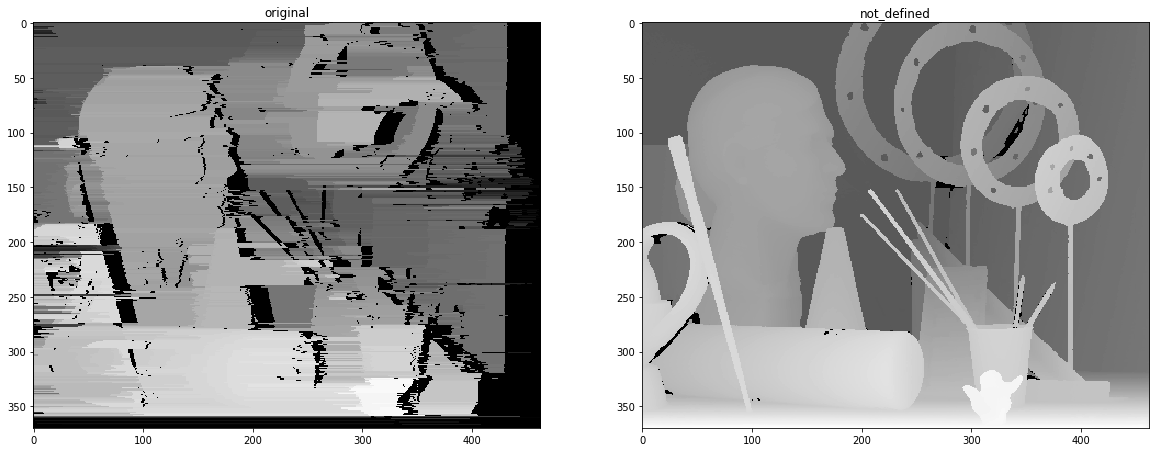

In [0]:
matcher = m(60, -20, -1)
im1 = loaded_imgs_1[0].astype(np.float64)
im2 = loaded_imgs_2[0].astype(np.float64)
matcher.set_images(im1, im2)

matcher.configure_instance()
x,raw_disp_map = matcher.run_pipeline()
u.plotTwoImages(raw_disp_map, loaded_disps[0])

In [0]:
progress_counter = 1
for m_score in range(loop_params["match"]["start"], loop_params["match"]["end"], loop_params["match"]["step"]):
    for gap_score in range(loop_params["gap"]["start"], loop_params["gap"]["end"], loop_params["gap"]["step"]):
        for egap_score in range(loop_params["egap"]["start"], loop_params["egap"]["end"], loop_params["egap"]["step"]):
            spec_dict["matrix_init_mode"] = 2
            match = spec_dict["match"] = m_score
            gap = spec_dict["gap"] = gap_score
            egap = spec_dict["egap"] = egap_score


            matcher = m(m_score, gap_score, egap_score)
            spec_dict["runtime"] = 0
            spec_dict["bad1"] = 0 #me.bad(disp_occluded, groundtruth_occluded, threshold = 1.0, non_occ= non_occ, print=wanna_print, occlusion_map = occlusion_map)
            spec_dict["bad15"] =0# me.bad(disp_occluded, groundtruth_occluded, threshold = 1.5, non_occ= non_occ, print=wanna_print, occlusion_map = occlusion_map)
            spec_dict["bad2"] = 0#me.bad(disp_occluded, groundtruth_occluded, threshold = 2, non_occ= non_occ, print=wanna_print, occlusion_map = occlusion_map)
            spec_dict["BAD8"] = 0#me.bad(disp_occluded, groundtruth_occluded, threshold = 10.0, non_occ= non_occ, print=wanna_print, occlusion_map = occlusion_map)

            spec_dict["ABS_ERR"] = 0# me.avge


    
            for im1, im2, disp in zip(loaded_imgs_1, loaded_imgs_2, loaded_disps):
                matcher.set_images(im1, im2)  
                matcher.configure_instance()      
                tic=time.time()

                x,raw_disp_map = matcher.run_pipeline()
                toc = time.time()

                #raw_disp_map = 255-raw_disp_map/(np.max(raw_disp_map))*255
                #inverted_disparity = np.max(raw_disp_map)-raw_disp_map 

                #disp_occluded = u.add_occlusions(raw_disp_map, occlusion_map)

                #u.plotNImages2([im2, groundtruth_occluded, disp_occluded], cols=3)

                wanna_print = False
                spec_dict["runtime"] += toc-tic
                spec_dict["bad1"] += me.bad(raw_disp_map, disp, threshold = 1.0, non_occ= False, print=wanna_print)
                spec_dict["BAD8"] += me.bad(raw_disp_map, disp, threshold = 10.0, non_occ= False, print=wanna_print)

                spec_dict["ABS_ERR"] += me.avgerr(raw_disp_map, disp, print=wanna_print, non_occ = False)

                spec_dict["output_file_path"] = "n.a."
                progress_bar.progress_bar(progress_counter, number_of_iterations, header= "Parameter search progress: ", progress_bar_steps=60)
                progress_counter+=1
            spec_dict["runtime"] /= NUMBER_OF_IMAGES
            spec_dict["bad1"] /= NUMBER_OF_IMAGES #me.bad(disp_occluded, groundtruth_occluded, threshold = 1.0, non_occ= non_occ, print=wanna_print, occlusion_map = occlusion_map)
            spec_dict["BAD8"] /= NUMBER_OF_IMAGES # me.bad(disp_occluded, groundtruth_occluded, threshold = 10.0, non_occ= non_occ, print=wanna_print, occlusion_map = occlusion_map)

            spec_dict["ABS_ERR"] /=NUMBER_OF_IMAGES # me.avgerr(disp_occluded, groundtruth_occluded, print=wanna_print, occlusion_map = occlusion_map)

            spec_dict["output_file_path"] = "n.a."
            log.append_new_sm_results(spec_dict)

Parameter search progress:  [>>>---------------------------------------------------------] 5.80 % completed: 536 / 9240 steps